# Martinotti cell

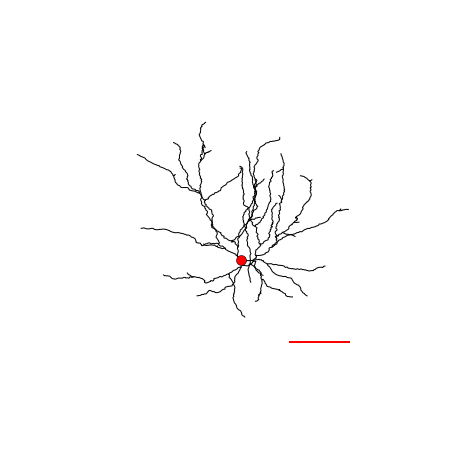

In [1]:
from neuron import h
from PyNeuronToolbox import neuromorpho,morphology
import pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm
import numpy as np
fig = plt.figure(figsize=(8,8))
xsc = np.array([0,100])
ysc = np.array([0,0])
view = (-90,-90)

## LAYER 2-3 MARTINOTTI Cell ##
neuromorpho.download('C100501A3', filename='martinotti_morph.swc')
martinotti = morphology.load('martinotti_morph.swc',use_axon=False)

ax = fig.gca(projection='3d')
morphology.shapeplot(h, ax, sections=martinotti.dend, color='k')
morphology.mark_locations(h,martinotti.soma[0], 0.5, color='r', ms=10)
ax.plot(xsc+90,ysc+200,'-r',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.savefig('martinotti_morph.png')
plt.show()


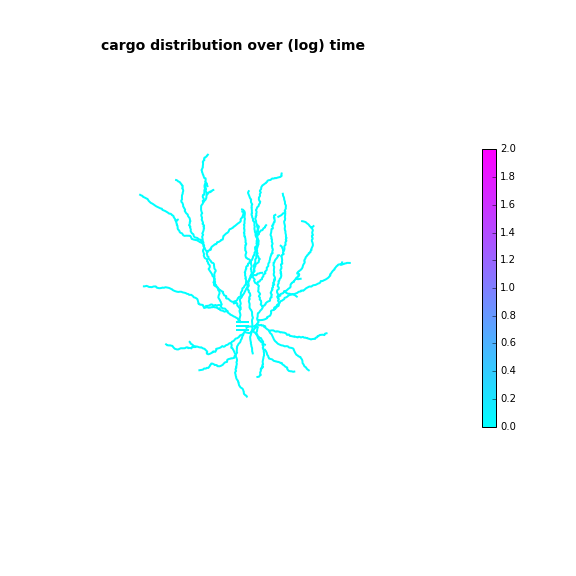
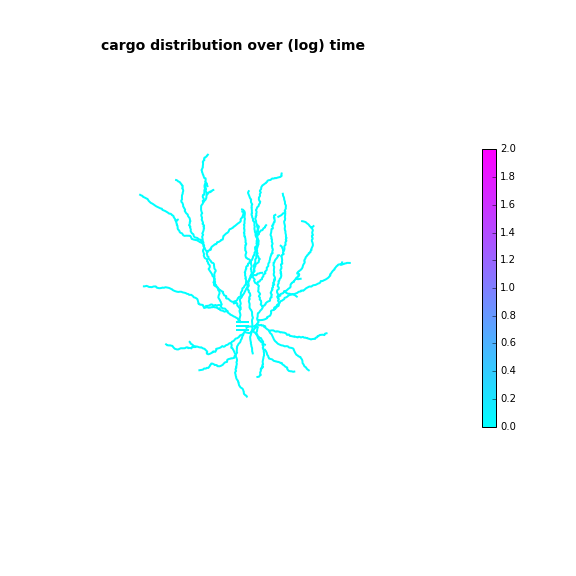
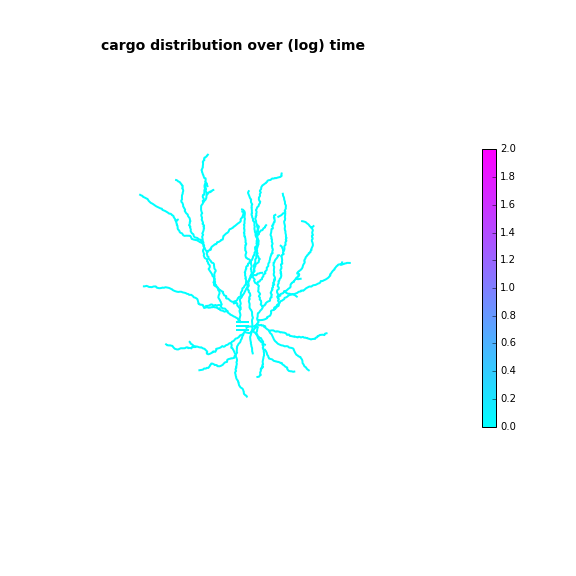
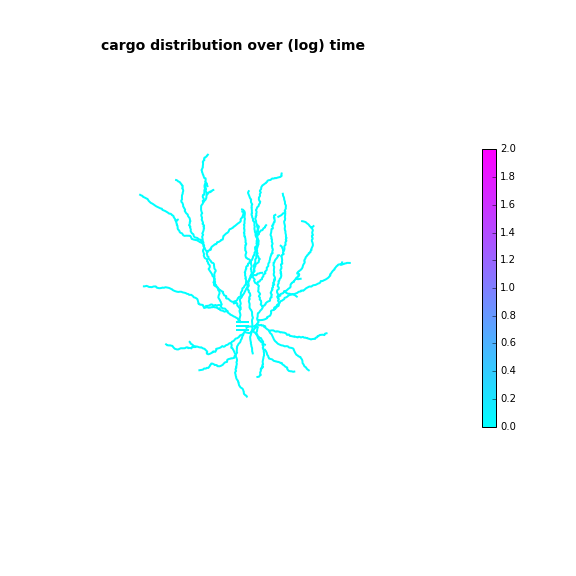
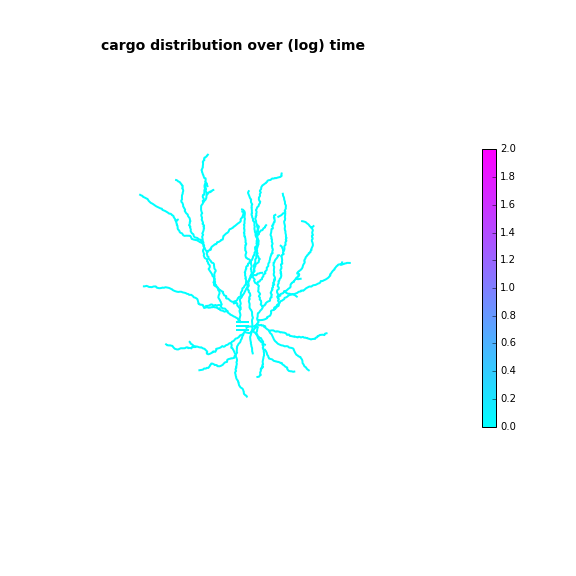
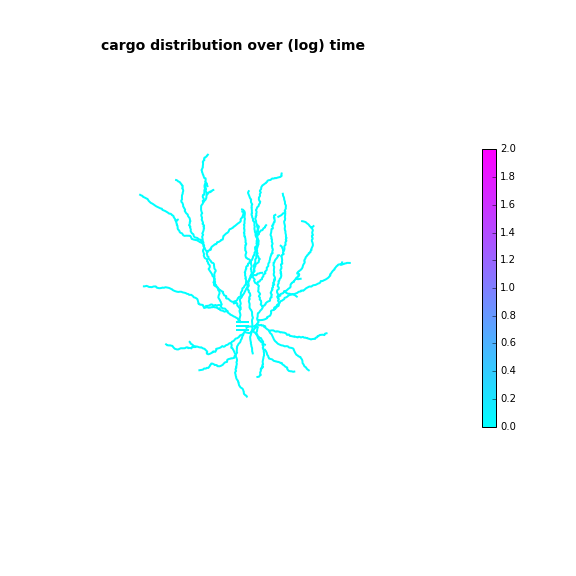
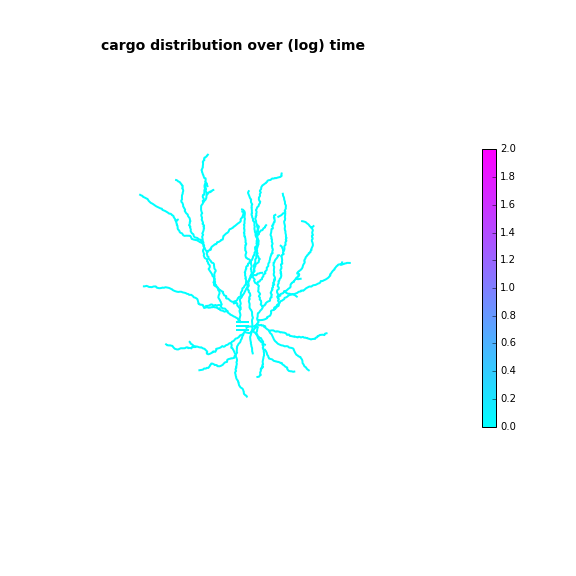
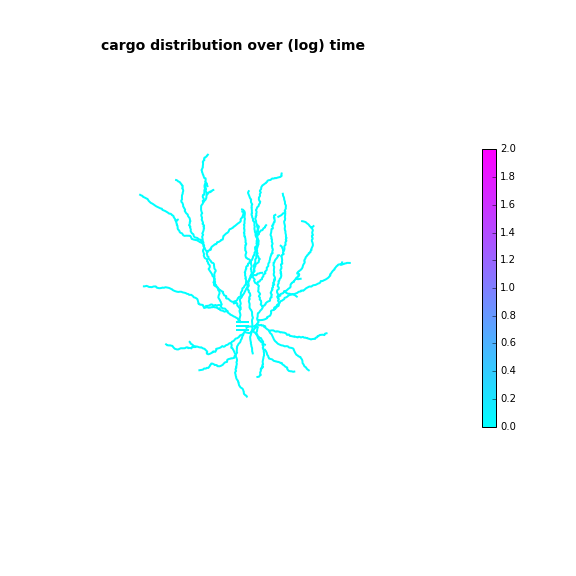
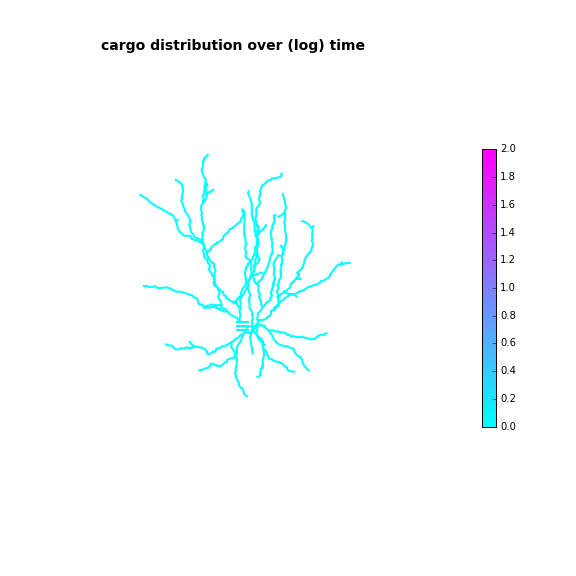
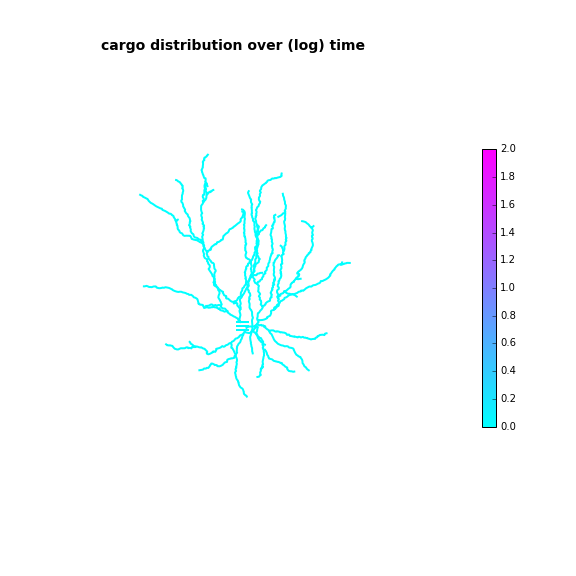
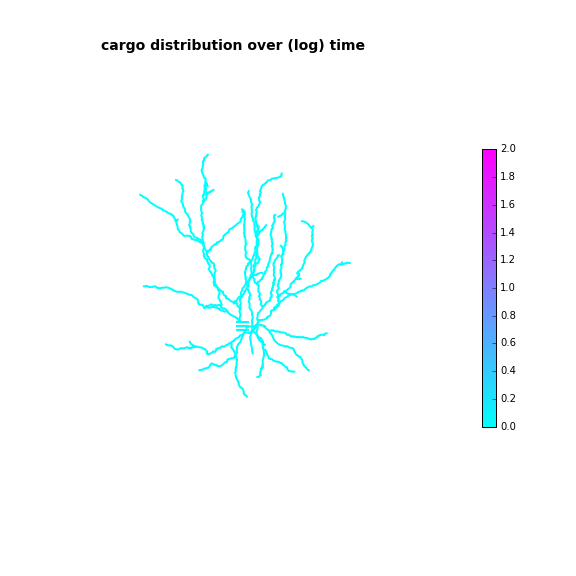
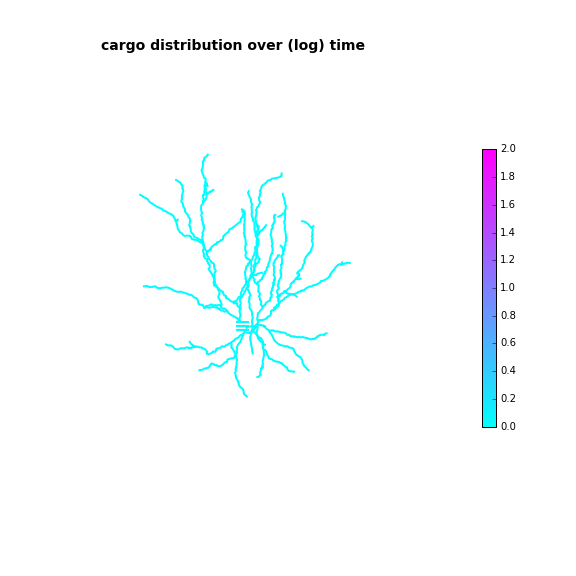
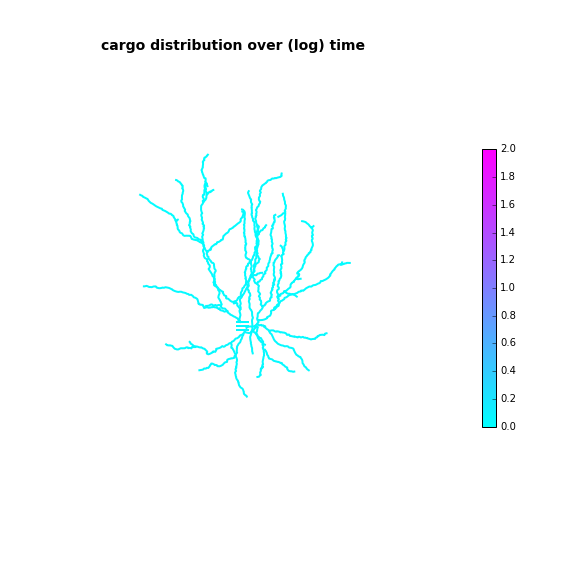
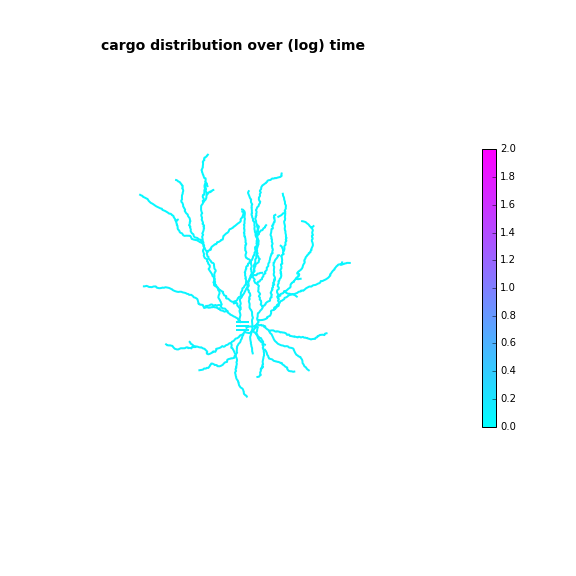
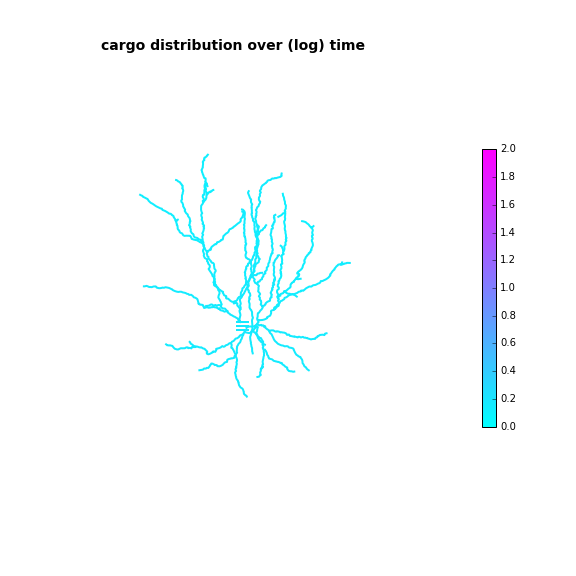
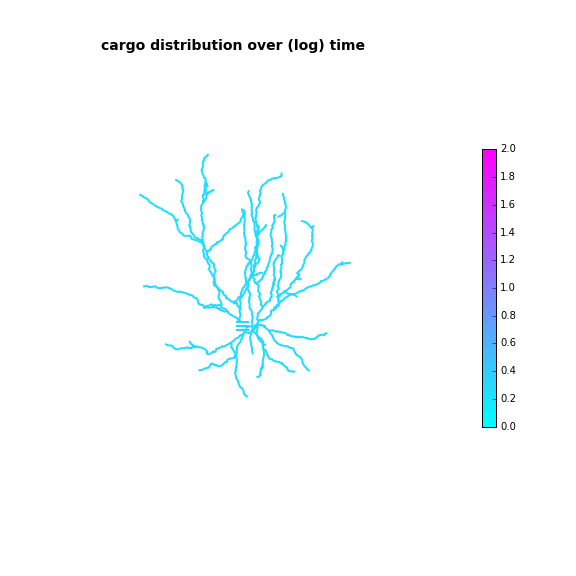
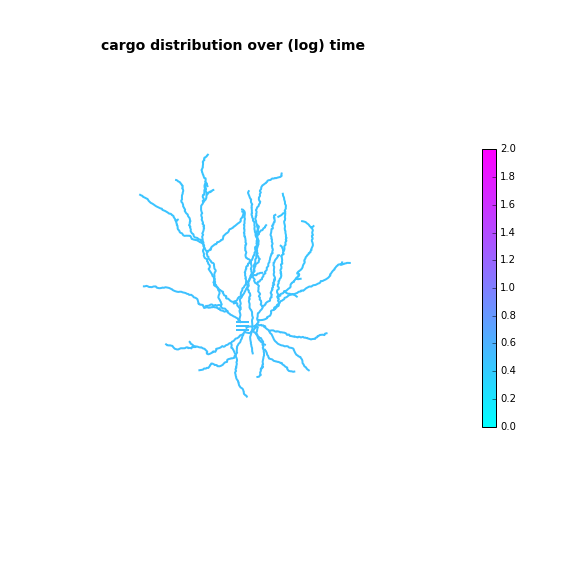
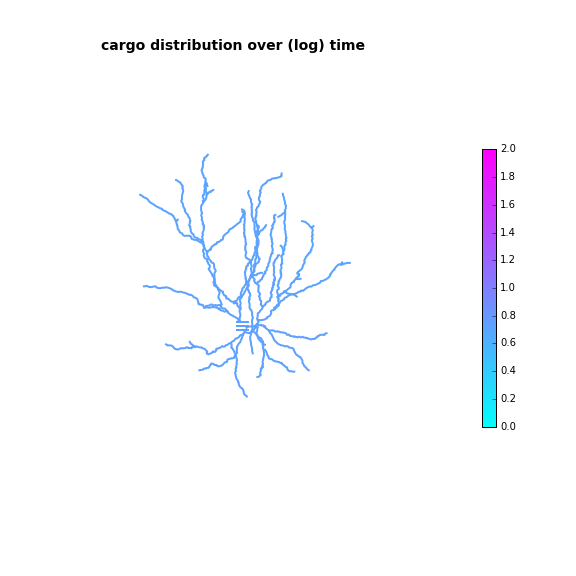
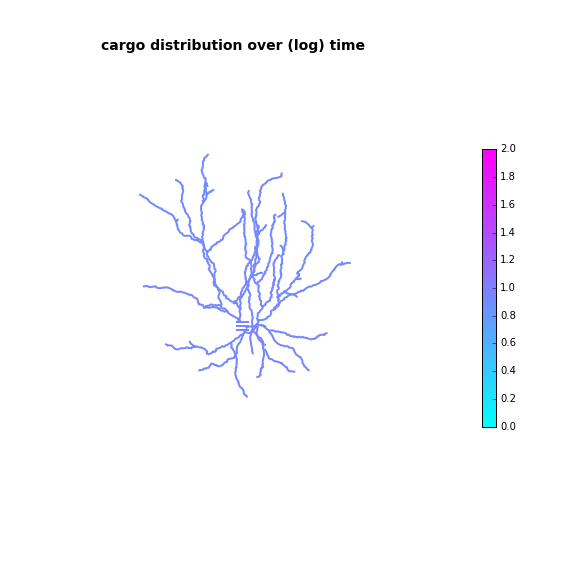
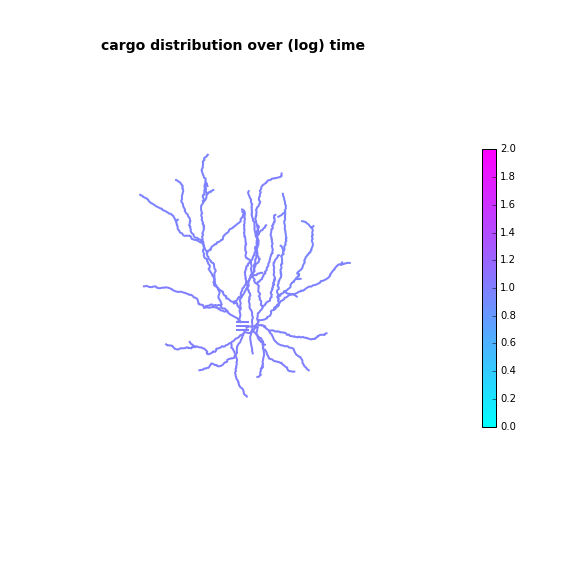
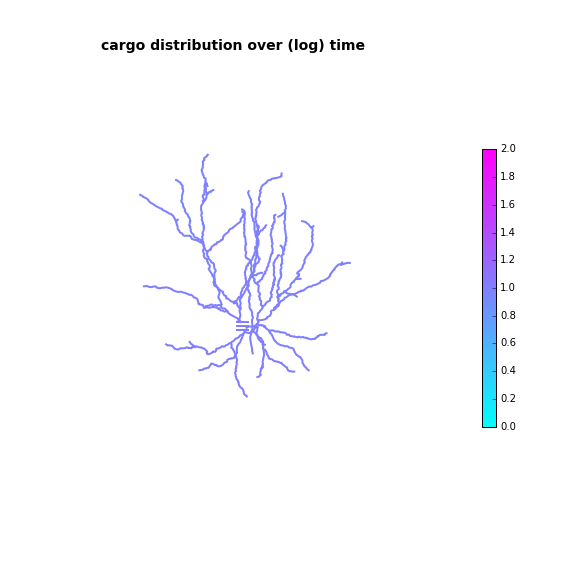
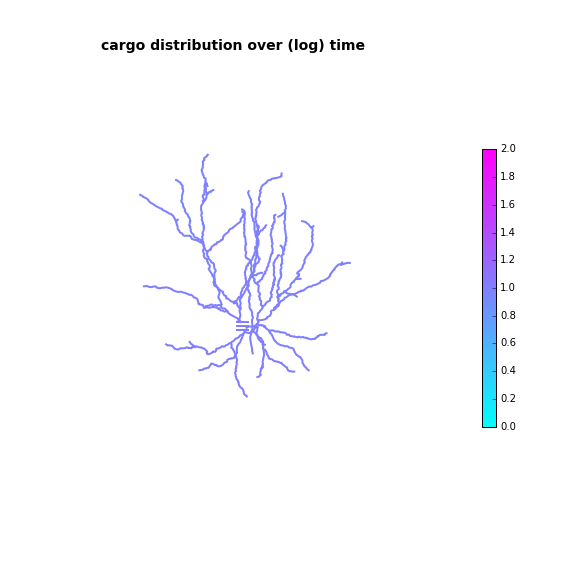
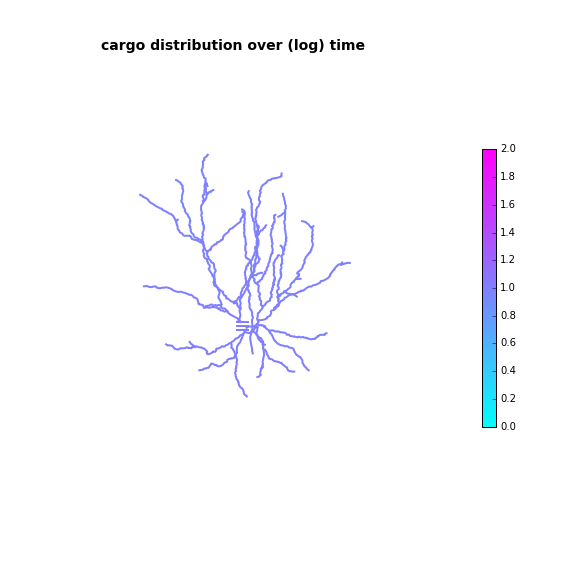
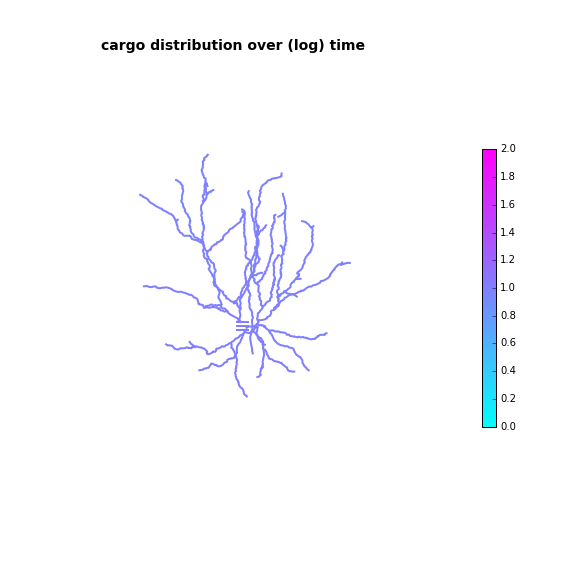

In [2]:
import fig8_sushi_belt

A,u,t,err = fig8_sushi_belt.run_uniform_sim(h, 1e-6, 4.0)
N = A.shape[1] / 2

## Make an animation to show the convergence
from PyNeuronToolbox.morphology import shapeplot_animate
from JSAnimation import IPython_display
from matplotlib import animation

clim = [0,2]
nframes = u.shape[0]

# Make an animation
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.title('cargo distribution over (log) time',fontweight='bold',fontsize=14)

# Hack to get a colorbar
# http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
sm._A = []
plt.colorbar(sm, shrink=0.5)
plt.tight_layout()

#plt.show()
anim_func = morphology.shapeplot_animate(u[:,N:],lines,nframes,clim=clim,cmap=cm.cool)
anim = animation.FuncAnimation(fig, anim_func, frames=nframes, interval=400)
anim

*
*
*
*
*
*


(0, 100)

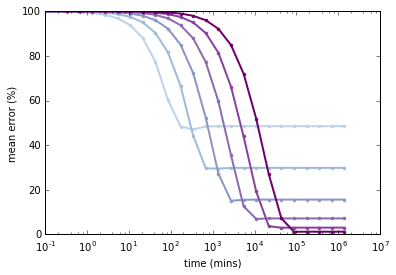

In [3]:
plt.figure()
palette = ['#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#6e016b']
detach_timescale = np.logspace(-4,-6,len(palette))
err = []
for i in range(len(detach_timescale)):
    print '*'
    A,u,t,err_ = fig8_sushi_belt.run_uniform_sim(h, detach_timescale[i], 4.0)
    plt.plot(t/60,err_,'.-',color=palette[i],lw=2)
    err.append(err_)

# save data
err = np.array(err)
np.savetxt('./data/martinotti.txt',err)

plt.xscale('log')
plt.ylabel('mean error (%)')
plt.xlabel('time (mins)')
plt.ylim([0,100])